In [1]:
import os
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import librosa.display
import IPython.display as ipd

## Reading Dataset

In [3]:
import pandas as pd
df1=pd.read_excel('Healthy_data.xlsx')
df2=pd.read_excel('Pathological_data.xlsx')
df=pd.concat([df1,df2], ignore_index=True)
df=df[df.Gender=='w']
df.head(10)
df.head(10)

,Recording Id,Type,Gender,Age,Diagnosis Notes,Pathology,Audio
0,1,n,w,20,Normal,Normal,1-a_n.wav
1,2,n,w,22,Normal,Normal,2-a_n.wav
2,3,n,w,23,Normal,Normal,3-a_n.wav
5,6,n,w,20,Normal,Normal,6-a_n.wav
6,7,n,w,19,Normal,Normal,7-a_n.wav
7,27,n,w,20,Normal,Normal,27-a_n.wav
8,17,n,w,19,Normal,Normal,17-a_n.wav
9,8,n,w,19,Normal,Normal,8-a_n.wav
11,10,n,w,22,Normal,Normal,10-a_n.wav
12,2200,n,w,26,Normal,Normal,2200-a_n.wav


In [4]:
df.shape

(929, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 929 entries, 0 to 1489
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Recording Id     929 non-null    int64 
 1   Type             929 non-null    object
 2   Gender           929 non-null    object
 3   Age              929 non-null    int64 
 4   Diagnosis Notes  866 non-null    object
 5   Pathology        929 non-null    object
 6   Audio            929 non-null    object
dtypes: int64(2), object(5)
memory usage: 58.1+ KB


In [6]:
type_gender_count = df.groupby(["Type","Gender"])[['Audio']].count()
type_gender_count

,,Audio
Type,Gender,
n,w,428
p,w,501


<Axes: xlabel='Type,Gender'>

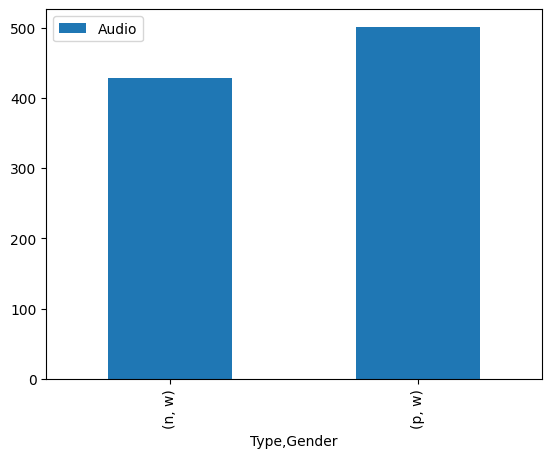

In [7]:
type_gender_count.plot.bar()

In [8]:
gender = df.Gender.unique()
pathology = df.Pathology.unique()
print(gender)
print(pathology)

['w']
['Normal' 'Dysphonia' 'Laryngitis' 'Recurrent palsy']


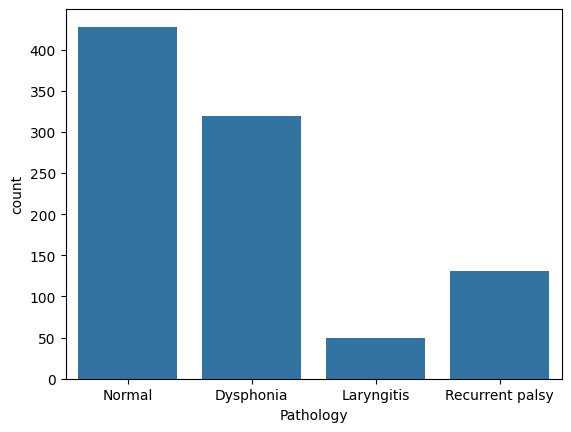

In [9]:
sns.countplot(x=df["Pathology"])
plt.show()

## Extract Features

In [10]:
## Extracting MFCC's for every audio file
import pandas as pd
import os

audio_dataset_path = 'Filtered_Audio_Dataset/'

In [11]:
def features_extraction(file):
    audio, sample_rate = librosa.load(file_name)
    mfccs_features = librosa.feature.mfcc(y=audio, n_mfcc=80)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    
    return mfccs_scaled_features

In [12]:
import numpy as np
from tqdm import tqdm

extracted_features=[]
for index_num,row in tqdm(df.iterrows()):
    file_name = audio_dataset_path+row["Audio"]
    final_class_labels = row["Type"]
    data = features_extraction(file_name)
    extracted_features.append([data,final_class_labels])

929it [00:21, 44.10it/s]


In [13]:
extracted_features_df = pd.DataFrame(extracted_features, columns=['feature','class'])
extracted_features_df.head(10)

,feature,class
0,"[-261.49933, 114.805534, -72.840965, -0.931277...",n
1,"[-202.87245, 145.96022, -68.10183, -11.444383,...",n
2,"[-167.76535, 133.49133, -77.94643, -9.826728, ...",n
3,"[-205.02122, 137.12006, -66.55497, -12.496069,...",n
4,"[-217.24478, 145.07858, -100.58555, 2.7787614,...",n
5,"[-227.11813, 127.75929, -63.862732, -13.961372...",n
6,"[-196.28305, 113.32672, -99.92175, 1.0585632, ...",n
7,"[-207.56131, 135.24808, -61.779488, -17.637135...",n
8,"[-201.10626, 158.06732, -36.131306, 1.6452157,...",n
9,"[-277.55927, 161.18881, -30.51163, -16.397873,...",n


In [14]:
extracted_features_df.shape

(929, 2)

In [15]:
extracted_features_df["feature"][0]

array([-2.61499329e+02,  1.14805534e+02, -7.28409653e+01, -9.31277871e-01,
       -6.87778549e+01, -2.90463376e+00,  4.69877529e+00,  7.56695986e+00,
       -3.33707962e+01,  1.76828156e+01, -4.03612089e+00, -1.42697287e+01,
        9.20465565e+00, -2.80942898e+01, -1.00394077e+01, -1.63144569e+01,
       -9.73753095e-01, -4.31138134e+00, -9.75323021e-01, -1.19480648e+01,
        4.30604649e+00, -9.05258274e+00,  8.25730264e-02,  4.08039131e+01,
        2.39141750e+01,  6.14854851e+01,  3.20326614e+01,  8.02177048e+00,
       -2.74810147e+00, -9.03449821e+00,  4.29856348e+00, -1.17523634e+00,
        1.33330641e+01, -6.40946245e+00, -1.52622843e+01, -5.44703770e+00,
        1.03529129e+01, -3.11023307e+00, -8.39600277e+00, -7.93014669e+00,
       -5.57793570e+00,  1.33628864e+01, -4.67780113e+00, -1.73656483e+01,
       -1.20797033e+01,  3.30997729e+00, -6.23456812e+00,  1.79914856e+00,
        1.81635227e+01,  3.11546078e+01,  3.39731293e+01,  2.36189723e+00,
        3.56650442e-01,  

In [16]:
## Label Encoding
dummy_data = pd.get_dummies(extracted_features_df['class'])

In [17]:
dummy_data

,n,p
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False
...,...,...
924,False,True
925,False,True
926,False,True
927,False,True


In [18]:
x=np.array(extracted_features_df['feature'].values.tolist())
y=dummy_data

In [19]:
x.shape

(929, 80)

In [20]:
y.shape

(929, 2)

In [21]:
### Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify= y, test_size=0.2,random_state=0)

In [22]:
x_train.shape

(743, 80)

In [23]:
x_test.shape

(186, 80)

In [24]:
y_train.shape

(743, 2)

In [25]:
y_test.shape

(186, 2)

## Model Training

In [26]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

In [28]:
## No. of classes
num_labels=y.shape[1]
num_labels

2

In [29]:
model=Sequential()
## first layer
model.add(Dense(256,input_shape=(80,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
## second layer
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
## third layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
## final Layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [30]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               20736     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               1

In [32]:
## Training my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs=150
num_batch_size=32

checkpointer=ModelCheckpoint(filepath='/audio_classification.hdf5', verbose=1, save_best_only=True)
start=datetime.now()

model.fit(x_train,y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test,y_test), callbacks=[checkpointer])
duration=datetime.now()-start

print("Training completed in time: ",duration)

Epoch 1/150
15/24 [=================>............] - ETA: 0s - loss: 12.9323 - accuracy: 0.4938
Epoch 1: val_loss improved from inf to 2.90883, saving model to /audio_classification.hdf5


C:\Anaconda\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


24/24 [==============================] - 2s 40ms/step - loss: 11.6985 - accuracy: 0.5087 - val_loss: 2.9088 - val_accuracy: 0.5000
Epoch 2/150
16/24 [===================>..........] - ETA: 0s - loss: 7.0462 - accuracy: 0.5098
Epoch 2: val_loss improved from 2.90883 to 1.10349, saving model to /audio_classification.hdf5
24/24 [==============================] - 0s 10ms/step - loss: 6.6141 - accuracy: 0.5303 - val_loss: 1.1035 - val_accuracy: 0.6505
Epoch 3/150
23/24 [===========================>..] - ETA: 0s - loss: 4.4657 - accuracy: 0.5394
Epoch 3: val_loss improved from 1.10349 to 0.75939, saving model to /audio_classification.hdf5
24/24 [==============================] - 0s 9ms/step - loss: 4.4618 - accuracy: 0.5370 - val_loss: 0.7594 - val_accuracy: 0.6290
Epoch 4/150
24/24 [==============================] - ETA: 0s - loss: 3.0288 - accuracy: 0.5478
Epoch 4: val_loss improved from 0.75939 to 0.71171, saving model to /audio_classification.hdf5
24/24 [==============================] -

Epoch 30/150
13/24 [===============>..............] - ETA: 0s - loss: 0.6656 - accuracy: 0.6466
Epoch 30: val_loss improved from 0.64340 to 0.64219, saving model to /audio_classification.hdf5
24/24 [==============================] - 0s 9ms/step - loss: 0.6748 - accuracy: 0.6312 - val_loss: 0.6422 - val_accuracy: 0.5806
Epoch 31/150
24/24 [==============================] - ETA: 0s - loss: 0.6248 - accuracy: 0.6743
Epoch 31: val_loss did not improve from 0.64219
24/24 [==============================] - 0s 6ms/step - loss: 0.6248 - accuracy: 0.6743 - val_loss: 0.6440 - val_accuracy: 0.5968
Epoch 32/150
15/24 [=================>............] - ETA: 0s - loss: 0.6556 - accuracy: 0.6458
Epoch 32: val_loss did not improve from 0.64219
24/24 [==============================] - 0s 5ms/step - loss: 0.6667 - accuracy: 0.6326 - val_loss: 0.6452 - val_accuracy: 0.5914
Epoch 33/150
14/24 [================>.............] - ETA: 0s - loss: 0.6570 - accuracy: 0.6362
Epoch 33: val_loss did not improve fr

Epoch 58/150
20/24 [========================>.....] - ETA: 0s - loss: 0.5410 - accuracy: 0.7094
Epoch 58: val_loss did not improve from 0.59121
24/24 [==============================] - 0s 7ms/step - loss: 0.5333 - accuracy: 0.7160 - val_loss: 0.5912 - val_accuracy: 0.6398
Epoch 59/150
24/24 [==============================] - ETA: 0s - loss: 0.5420 - accuracy: 0.6958
Epoch 59: val_loss improved from 0.59121 to 0.58812, saving model to /audio_classification.hdf5
24/24 [==============================] - 0s 12ms/step - loss: 0.5420 - accuracy: 0.6958 - val_loss: 0.5881 - val_accuracy: 0.6667
Epoch 60/150
13/24 [===============>..............] - ETA: 0s - loss: 0.5579 - accuracy: 0.7139
Epoch 60: val_loss did not improve from 0.58812
24/24 [==============================] - 0s 6ms/step - loss: 0.5802 - accuracy: 0.6958 - val_loss: 0.5898 - val_accuracy: 0.6774
Epoch 61/150
14/24 [================>.............] - ETA: 0s - loss: 0.5134 - accuracy: 0.7612
Epoch 61: val_loss improved from 0.5

Epoch 116/150
13/24 [===============>..............] - ETA: 0s - loss: 0.2920 - accuracy: 0.8846
Epoch 116: val_loss did not improve from 0.54381
24/24 [==============================] - 0s 6ms/step - loss: 0.2979 - accuracy: 0.8694 - val_loss: 0.7017 - val_accuracy: 0.6989
Epoch 117/150
21/24 [=========================>....] - ETA: 0s - loss: 0.3094 - accuracy: 0.8750
Epoch 117: val_loss did not improve from 0.54381
24/24 [==============================] - 0s 8ms/step - loss: 0.3079 - accuracy: 0.8735 - val_loss: 0.7028 - val_accuracy: 0.6989
Epoch 118/150
22/24 [==========================>...] - ETA: 0s - loss: 0.2847 - accuracy: 0.8651
Epoch 118: val_loss did not improve from 0.54381
24/24 [==============================] - 0s 7ms/step - loss: 0.2887 - accuracy: 0.8668 - val_loss: 0.6755 - val_accuracy: 0.7043
Epoch 119/150
19/24 [======================>.......] - ETA: 0s - loss: 0.2762 - accuracy: 0.8701
Epoch 119: val_loss did not improve from 0.54381
24/24 [======================

Epoch 146/150
19/24 [======================>.......] - ETA: 0s - loss: 0.2032 - accuracy: 0.9227
Epoch 146: val_loss did not improve from 0.54381
24/24 [==============================] - 0s 9ms/step - loss: 0.2125 - accuracy: 0.9098 - val_loss: 0.8586 - val_accuracy: 0.7151
Epoch 147/150
18/24 [=====================>........] - ETA: 0s - loss: 0.2420 - accuracy: 0.9010
Epoch 147: val_loss did not improve from 0.54381
24/24 [==============================] - 0s 9ms/step - loss: 0.2412 - accuracy: 0.8977 - val_loss: 0.8343 - val_accuracy: 0.6989
Epoch 148/150
21/24 [=========================>....] - ETA: 0s - loss: 0.2194 - accuracy: 0.9182
Epoch 148: val_loss did not improve from 0.54381
24/24 [==============================] - 0s 7ms/step - loss: 0.2266 - accuracy: 0.9166 - val_loss: 0.7459 - val_accuracy: 0.7043
Epoch 149/150
22/24 [==========================>...] - ETA: 0s - loss: 0.1876 - accuracy: 0.9276
Epoch 149: val_loss did not improve from 0.54381
24/24 [======================

In [33]:
test_accuracy=model.evaluate(x_test,y_test,verbose=0)
print(test_accuracy[1])

0.698924720287323


In [34]:
y_pred = model.predict(x_test)

6/6 [==============================] - 0s 2ms/step


In [35]:
y_pred

array([[2.2696990e-01, 7.7303010e-01],
       [1.0869355e-02, 9.8913062e-01],
       [6.7914212e-01, 3.2085788e-01],
       [6.4963418e-01, 3.5036582e-01],
       [9.2630112e-01, 7.3698871e-02],
       [8.9525753e-01, 1.0474247e-01],
       [9.7703201e-01, 2.2968000e-02],
       [8.5076445e-01, 1.4923559e-01],
       [9.9999905e-01, 9.7405064e-07],
       [1.7802100e-10, 1.0000000e+00],
       [1.9522639e-02, 9.8047733e-01],
       [8.9882648e-01, 1.0117354e-01],
       [1.0936379e-02, 9.8906368e-01],
       [1.4276500e-01, 8.5723501e-01],
       [1.2149921e-03, 9.9878508e-01],
       [6.5559697e-01, 3.4440300e-01],
       [2.1834332e-03, 9.9781656e-01],
       [8.9325505e-01, 1.0674496e-01],
       [2.1206477e-01, 7.8793520e-01],
       [9.5679408e-01, 4.3205928e-02],
       [3.8830726e-03, 9.9611688e-01],
       [6.3808894e-01, 3.6191112e-01],
       [9.9639857e-01, 3.6014551e-03],
       [1.0000000e+00, 2.3556965e-11],
       [8.5852593e-01, 1.4147408e-01],
       [1.9420846e-01, 8.

In [36]:
y_test.values

array([[False,  True],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [ True, False],
       [False,  True],
       [False,  True],
       [False,  True],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [False,  True],
       [ True, False],
       [False,  True],
       [Fal

6/6 [==============================] - 0s 4ms/step


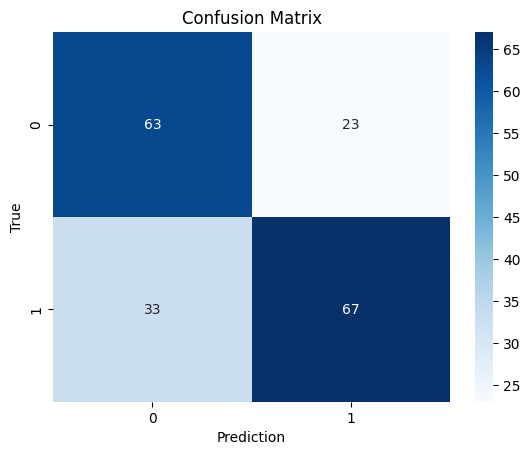

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

#compute confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)

#Plot confusion matrix
sns.heatmap( conf_matrix, annot=True, fmt='d', cmap= 'Blues')
plt.xlabel('Prediction')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Model Evaluation

In [37]:
filename = 'Male_Female_Healthy_Dataset/1004-a_n.wav'

In [38]:
feature_df = pd.DataFrame(features_extraction(filename)).transpose()

In [39]:
feature_df

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,-182.332748,138.173431,-84.687096,10.047243,-48.317905,9.40225,2.296518,4.65991,-13.330125,9.432405,...,-3.532734,1.599048,2.740876,-0.671063,1.497601,-0.059052,-2.493449,-0.113035,5.037437,-0.590547


In [40]:
features = np.array(feature_df.values.tolist())

In [41]:
features.shape

(1, 80)

In [42]:
model.predict(features)

1/1 [==============================] - 0s 34ms/step


array([[0.26316506, 0.73683494]], dtype=float32)